[*********************100%***********************]  1 of 1 completed


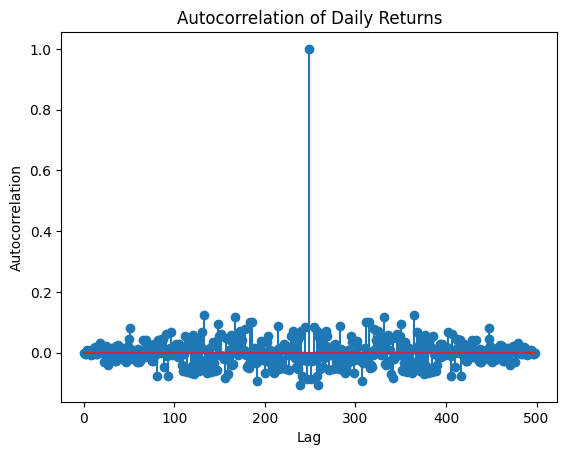

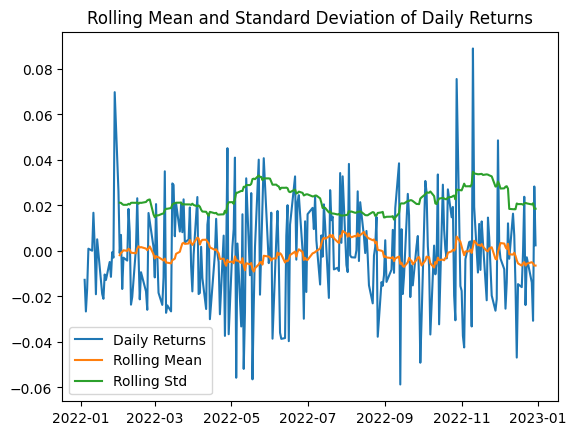

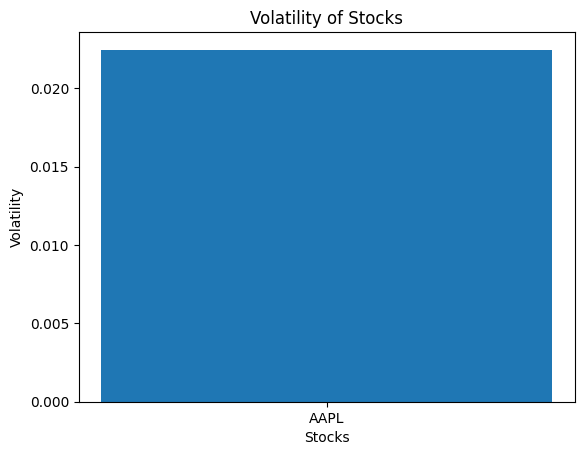

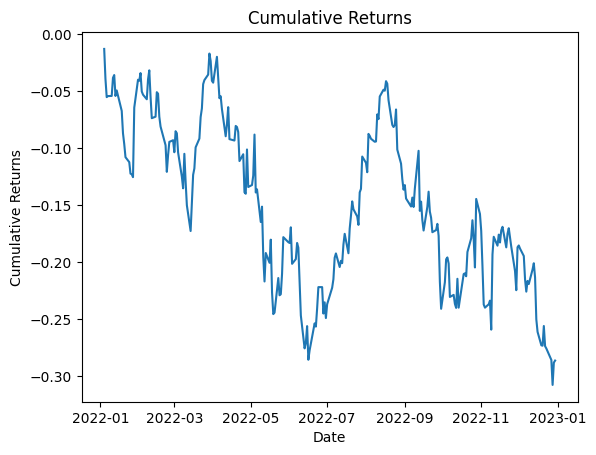

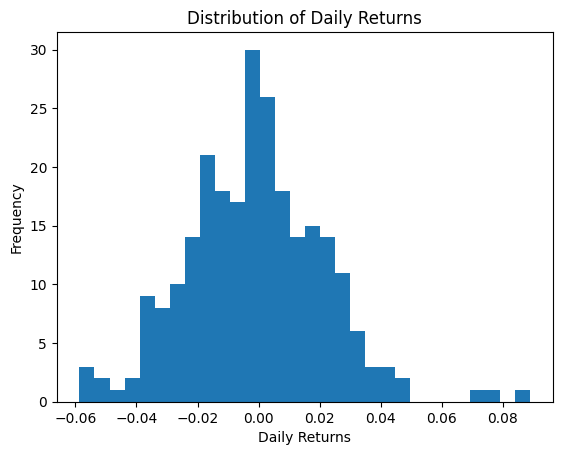

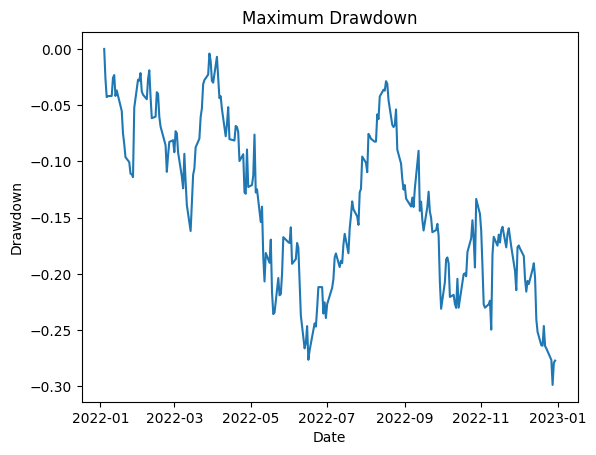

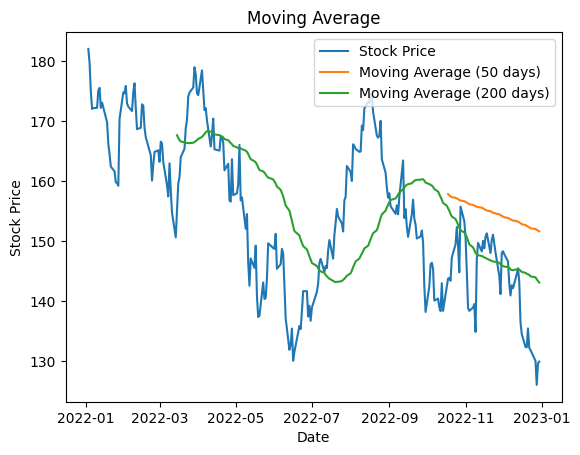

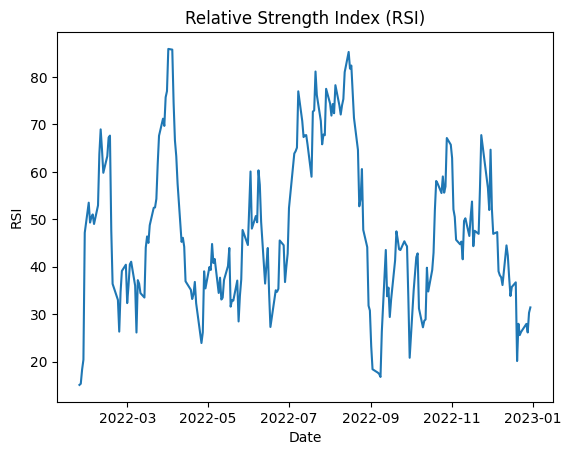

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the stock symbol and date range
datas = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Retrieve the stock data
stock_data = yf.download(datas, start=start_date, end=end_date)

# Calculate the daily returns
daily_returns = stock_data['Close'].pct_change().dropna()

# Calculate the autocorrelation using NumPy
autocorr = np.correlate(daily_returns, daily_returns, mode='full')

# Normalize the autocorrelation values
autocorr /= autocorr.max()

# Plot the autocorrelation
plt.stem(autocorr)
plt.title('Autocorrelation of Daily Returns')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Calculate rolling mean and rolling standard deviation
rolling_mean = daily_returns.rolling(window=20).mean()
rolling_std = daily_returns.rolling(window=20).std()

# Plot rolling statistics
plt.plot(daily_returns, label='Daily Returns')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Daily Returns')
plt.show()


# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Plot cumulative returns
plt.plot(cumulative_returns)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Plot distribution of daily returns
plt.hist(daily_returns, bins=30)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Calculate maximum drawdown
cumulative_returns_plus_1 = cumulative_returns + 1
running_max = np.maximum.accumulate(cumulative_returns_plus_1)
drawdown = (cumulative_returns_plus_1) / running_max - 1

# Plot maximum drawdown
plt.plot(drawdown)
plt.title('Maximum Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()

# Calculate the moving average with different window sizes
moving_average_50 = stock_data['Close'].rolling(window=200).mean()
moving_average_200 = stock_data['Close'].rolling(window=50).mean()

# Plot moving averages
plt.plot(stock_data['Close'], label='Stock Price')
plt.plot(moving_average_50, label='Moving Average (50 days)')
plt.plot(moving_average_200, label='Moving Average (200 days)')
plt.legend()
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Calculate the Relative Strength Index (RSI)
window_length = 14
delta = stock_data['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
average_gain = gain.rolling(window_length).mean()
average_loss = loss.rolling(window_length).mean()
relative_strength = average_gain / average_loss
rsi = 100 - (100 / (1 + relative_strength))

# Plot RSI
plt.plot(rsi)
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()
